# QRSM Analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import QuadraticAnalysisToolkit as QAT
plt.rcParams['figure.figsize'] = (10, 6)

## Set up grid and sampling info

In [2]:
lo = [0.01, 0.3]
hi = [0.1, 0.9]
csvfile = 'output2.csv'
csvdelimiter = ','
skipheader = 1

## Open CSV file with samples

In [3]:
# Open the csv file in a Grid object
fullgrid = QAT.Grid()
fullgrid.initFromCSV(csvfile, delimiter=csvdelimiter, skip_header=skipheader)

## Do QRSM Analysis

### Use Elliptical Optimization and check against a Uniformly Spaced Mesh

This carries out a QRSM analysis as well as a uniformly spaced mesh evaluation of the quadratic fit to compare against the extrema reported by the QRSM algorithm. Using `nmesh=1000` means the regularly spaced mesh will consist of `1000` values along each dimension, so the size of the mesh is `1000^N` points for `N` dimensions.

In [4]:
quada = QAT.QuadraticAnalysis(fullgrid, lo, hi, nmesh=1000)

/home/dwillcox/codes/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:506: RuntimeWarning: divide by zero encountered in true_divide
  f += hp**2 / (4. * (mup + x)**2)
/home/dwillcox/codes/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:506: RuntimeWarning: divide by zero encountered in double_scalars
  f += hp**2 / (4. * (mup + x)**2)


Let's print out the quadratic fit coefficients with 1 standard deviation fit errors:

In [5]:
print(quada.qfit)

f(x) = (0.559567248037217 +/- 0.0064479990258299695) + 
       (-1.1322751540276104 +/- 0.07535353083263606) x[0] + 
       (0.13778613804801929 +/- 0.021283224287338632) x[1] + 
       (0.4645735171653338 +/- 0.08288491403686708) x[0] * x[1] + 
       (5.768756688622785 +/- 0.5877497899192619) x[0]**2 + 
       (-0.20601276511812017 +/- 0.01717530503308859) x[1]**2

Sum of squares of residuals: 0.0057913168400311275
Coefficient of determination (R^2): 0.9258849180359886


And now let's print the bounds of the elliptic optimization:

In [6]:
print(quada.eopt)

Inner Bounds: [0.4948010257000814, 0.5668330738454507]
Inner Bounds: [0.4948205046289135, 0.5668300608406416] (Mesh)
Outer Bounds: [0.4659058600753612, 0.5841717450143347]
Outer Bounds: [0.4661101617577449, 0.5841614464449248] (Mesh)


### Use Rectangular Optimization

In [7]:
quada_rect = QAT.QuadraticAnalysis(fullgrid, lo, hi, method='rectangular')

And now let's print the bounds of the rectangular optimization:

In [8]:
print(quada_rect.ropt)

Rectangular Bounds: [0.4946016169499976, 0.5734397962926204]



## Plot Results

In [9]:
data = []
data.append(dict(label='QRSM (Inner, Optimum)', xlo=quada.eopt.inner_min, xhi=quada.eopt.inner_max, color='m'))
data.append(dict(label='QRSM (Inner, $10^6$ pt.)', xlo=quada.eopt.mesh_inner_min, xhi=quada.eopt.mesh_inner_max, color='m', linestyle=':'))
data.append(dict(label='QRSM (Outer, Optimum)', xlo=quada.eopt.outer_min, xhi=quada.eopt.outer_max, color='m'))
data.append(dict(label='QRSM (Outer, $10^6$ pt.)', xlo=quada.eopt.mesh_outer_min, xhi=quada.eopt.mesh_outer_max, color='m', linestyle=':'))
data.append(dict(label='Rectangular Optimization', xlo=quada_rect.ropt.min_function, xhi=quada_rect.ropt.max_function, color='g'))

/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/dwillcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


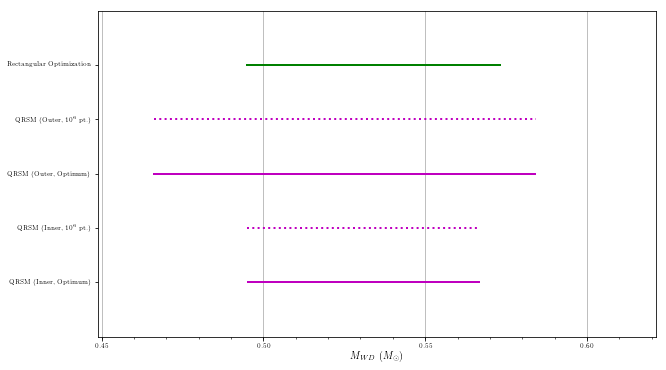

In [11]:
def plot_interval(ypos, xlo, xhi, color='b', linestyle='-', lw=2, label=None):
    plt.hlines(ypos, xlo, xhi, color, linestyle=linestyle, lw=lw)
    
def get_data_extrema(ddict):
    xlos = []
    xhis = []
    for di in ddict:
        xlos.append(di['xlo'])
        xhis.append(di['xhi'])
    xlo = np.amin(xlos)
    xhi = np.amax(xhis)
    return xlo, xhi

nlabels = len(data)

for i, d in enumerate(data):
    d['ypos'] = float(i+1)/float(nlabels+1)
    plot_interval(**d)

ax = plt.gca()

dlo, dhi = get_data_extrema(data)
eps = 0.01*(dhi-dlo)

ypos = [d['ypos'] for d in data]
labs = [d['label'] for d in data]

plt.yticks(ypos, labs)
plt.ylim(0,1)

xticks_major = np.arange(0.45, 0.70, 0.05)
xticks_minor = np.arange(0.45, 0.70, 0.01)

# Large major labels
ax.tick_params(axis = 'both', which = 'major', labelsize = 6)

# No minor labels
ax.tick_params(axis = 'both', which = 'minor', labelsize = 0)

# Set Major and Minor xticks
ax.set_xticks(xticks_major)
ax.set_xticks(xticks_minor, minor = True)

# Direct ticks outside
ax.tick_params(which = 'both', direction = 'out')

# Reset x limit
plt.xlim(0.45-eps, 0.62+eps)

# Draw x axis grids
ax.xaxis.grid(True)

plt.xlabel('$M_{WD}~(M_{\odot})$')
plt.savefig('cfintervals_with_rectangle.png', bbox_inches='tight', dpi=300)
plt.show()